In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import json
from datetime import datetime
import pandas as pd

In [2]:
file_name = "data/greenpaper_price.json"

#read file
with open(file_name, "r") as file:
    content = file.read()

#parse raw dataset to json
json_content = json.loads(content)

#convert individual list from json dataset
dates = [datetime.strptime(each_price['date'][:10], "%Y-%m-%d") for each_price in json_content[0]["prices"]]
dates_index = [index for index in range(0, len(dates))]
prices = [float(json_content[0]["prices"][index]["price"][0:10]) for index in range(0, len(json_content[0]["prices"]))]

#create new dataframe
df = pd.DataFrame(data=prices, index=dates_index, columns=['Prices'], dtype=None, copy=False)

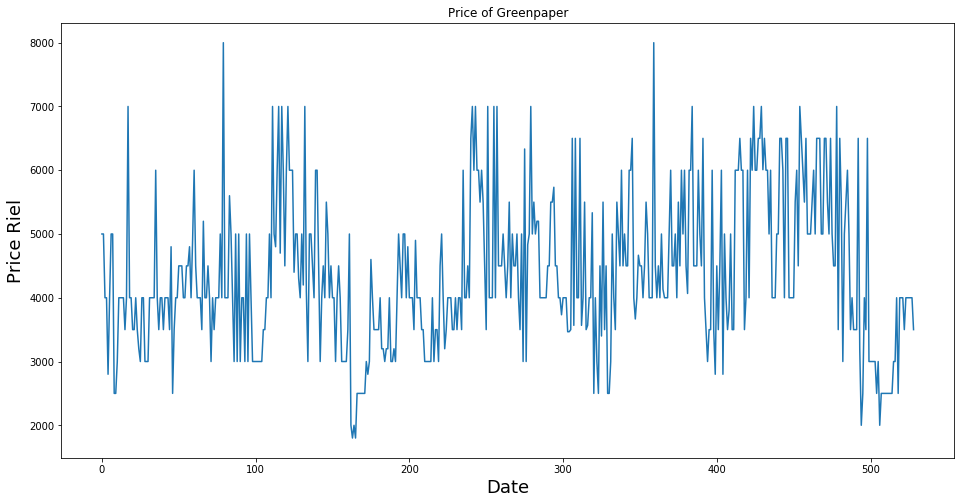

In [3]:
#vitualization
plt.figure(figsize=(16, 8))
plt.title('Price of Greenpaper')
plt.plot(df['Prices'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price Riel', fontsize=18)
plt.show()

In [4]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))

    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0]

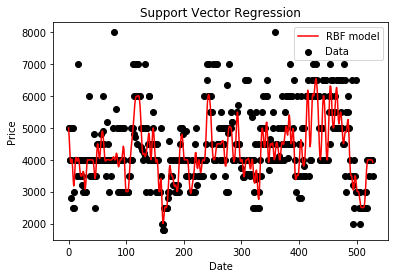

In [5]:
predict_price = predict_prices(dates_index, prices, [[len(dates_index)]])

In [6]:
if prices[-1] == round(predict_price):
    print('Price will stay SAME at', round(predict_price), 'riel.')
elif prices[-1] < round(predict_price):
    print('Price will go UP to', round(predict_price), 'riel.')
else:
    print('Price will go DOWN to', round(predict_price), 'riel.')

Price will go UP to 3893.0 riel.
